
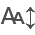

../data/raw/kaggle/input/playground-series-s4e4/train.csv
../data/raw/kaggle/input/playground-series-s4e4/test.csv
../data/raw/kaggle/input/playground-series-s4e4/sample_submission.csv


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics
import sklearn.model_selection

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False, connected=False)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

path='../data/raw/kaggle/input/playground-series-s4e4'

import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Features

https://archive.ics.uci.edu/dataset/1/abalone

- Sex	- M, F, and I (infant)
- Length - Longest shell measurement	mm
- Diameter - perpendicular to length	mm
- Height - with meat in shell	mm
- Whole_weight - whole abalone	grams
- Shucked_weight - weight of meat	grams
- Viscera_weight - gut weight (after bleeding)	grams
- Shell_weight - after being dried	grams
- Rings	Target - +1.5 gives the age in years

# Load data

In [2]:
df = pd.read_csv(f'{path}/train.csv')
df_test = pd.read_csv(f'{path}/test.csv')

show(df)
show(df_test)

# One-hot encode the sex

In [3]:
df_sex_dummies = pd.get_dummies(df.Sex)
df = pd.concat([df, df_sex_dummies], axis=1)

df_test_sex_dummies = pd.get_dummies(df_test.Sex)
df_test = pd.concat([df_test, df_test_sex_dummies], axis=1)

display(df.head())
display(df_test.head())

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,F,I,M
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False,False,True
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False,False,True
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False,False,True
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False,False,True
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,False,True,False


# Drop some features

In [4]:
df = df.drop(['id', 'Sex'], axis=1)
df_test = df_test.drop(['Sex'], axis=1) # id still needed later

display(df.head())
display(df_test.head())

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,F,I,M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False,False,True
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False,False,True
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False,False,True
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False,False,True
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,False,True,False


# Set target feature

In [5]:
X = df.drop('Rings', axis=1)
y = df['Rings']

display(X.head())
display(y.head())

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,False,True,False


0    11
1    11
2     6
3    10
4     9
Name: Rings, dtype: int64

# Split off validation set for testing.

In [6]:
# https://medium.com/analytics-vidhya/stratified-sampling-in-machine-learning-f5112b5b9cfe

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    X, y,
    test_size=0.2,
    random_state=23,
    stratify=y # to keep Rings distribution between splits approximately the same
  )

display(X_train.head())
display(X_val.head())
display(y_train.head())
display(y_val.head())

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
14409,0.530,0.415,0.160,0.8665,0.2950,0.1835,0.2725,False,False,True
26687,0.575,0.440,0.140,0.8720,0.3155,0.1695,0.2400,False,True,False
5083,0.440,0.345,0.135,0.4510,0.1785,0.0810,0.1200,True,False,False
24822,0.325,0.225,0.075,0.1445,0.0515,0.0235,0.0450,False,True,False
86069,0.625,0.470,0.155,1.1000,0.4145,0.2035,0.2900,True,False,False


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
48052,0.580,0.455,0.155,1.1030,0.5175,0.2425,0.2950,False,False,True
24389,0.375,0.275,0.090,0.2345,0.1125,0.0555,0.0725,False,True,False
35942,0.720,0.575,0.165,1.7405,0.6805,0.3575,0.5800,False,False,True
24943,0.520,0.400,0.130,0.5825,0.2505,0.1365,0.1800,False,True,False
1296,0.550,0.475,0.180,0.8690,0.3035,0.1940,0.3200,True,False,False


14409    20
26687    13
5083     12
24822     6
86069    10
Name: Rings, dtype: int64

48052    11
24389     8
35942    14
24943     8
1296     13
Name: Rings, dtype: int64

# Train XGBoost model

In [7]:
import xgboost as xgb

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=23
  )
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=None)

# Make predictions
predictions = model.predict(X_val)
print(predictions)

# Compute RMSLE
rmsle = np.sqrt(sklearn.metrics.mean_squared_log_error(y_val, predictions))
print(f'Validation RMSLE: {rmsle}' )

[10.588844  6.876002 17.71698  ... 11.40265   9.502815  8.946923]
Validation RMSLE: 0.15120994136199453


# XGBoost Hyperparameter Tuning

Reference: https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d

## GridSearchCV

In [8]:
params = {
  'n_estimators': [100, 200, 300],
  'min_child_weight': [1, 5, 10],
  'gamma': [0.5, 1, 1.5, 2, 5],
  'subsample': [0.6, 0.8, 1.0],
  'colsample_bytree': [0.6, 0.8, 1.0],
  'max_depth': [3, 4, 5]
}

# Define RMSLE as the evaluation metric
scorer = sklearn.metrics.make_scorer(lambda y, prediction: np.sqrt(sklearn.metrics.mean_squared_log_error(y, prediction)))

# Perform GridSearchCV
grid_search = sklearn.model_selection.GridSearchCV(model, params, scoring=scorer, cv=3, n_jobs=8, verbose=1)
grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Print best scores
print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Fitting 3 folds for each of 1215 candidates, totalling 3645 fits
# Best params:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
# Best score:  0.15562909582542564

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits
Best params:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
Best score:  0.15562909623168567


## RandomSearchCV

In [9]:
from scipy.stats import randint, uniform

params = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 500), 
    'min_child_weight': randint(1, 10), 
    'gamma': uniform(0.5, 2.0),
    'subsample': uniform(0, 1), 
    'colsample_bytree': uniform(0, 1),
    'max_depth': randint(3, 6)
}

# Define RMSLE as the evaluation metric
scorer = sklearn.metrics.make_scorer(lambda y_true, y_pred: np.sqrt(sklearn.metrics.mean_squared_log_error(y_true, y_pred)))

# Perform RandomizedSearchCV
random_search = sklearn.model_selection.RandomizedSearchCV(model, params, n_iter=100, scoring=scorer, cv=5, n_jobs=8, verbose=1)
random_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Print best scores
print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best params:  {'colsample_bytree': 0.012314958999426362, 'gamma': 2.3119404591579933, 'learning_rate': 0.012610675251619944, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 128, 'subsample': 0.7353106396614744}
# Best score:  0.19911922111767008

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params:  {'colsample_bytree': 0.05935513474490928, 'gamma': 2.4664532996644963, 'learning_rate': 0.01503100921373545, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 189, 'subsample': 0.039234492285720624}
Best score:  0.1867355470462832


# Train again with best parameters

In [8]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=23,
    colsample_bytree=0.012314958999426362,
    gamma=2.3119404591579933,
    learning_rate=0.012610675251619944,
    max_depth=4,
    min_child_weight=7,
    n_estimators=128,
    subsample=0.7353106396614744
  )
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=None)

# Make predictions
predictions = model.predict(X_val)
print(predictions)

# Compute RMSLE
rmsle = np.sqrt(sklearn.metrics.mean_squared_log_error(y_val, predictions))
print(f'Validation RMSLE: {rmsle}' )

[10.762631   7.802141  11.870447  ... 10.4740715 10.691105  10.102956 ]
Validation RMSLE: 0.19991200526357827


# Actual vs. predicted values for comparison

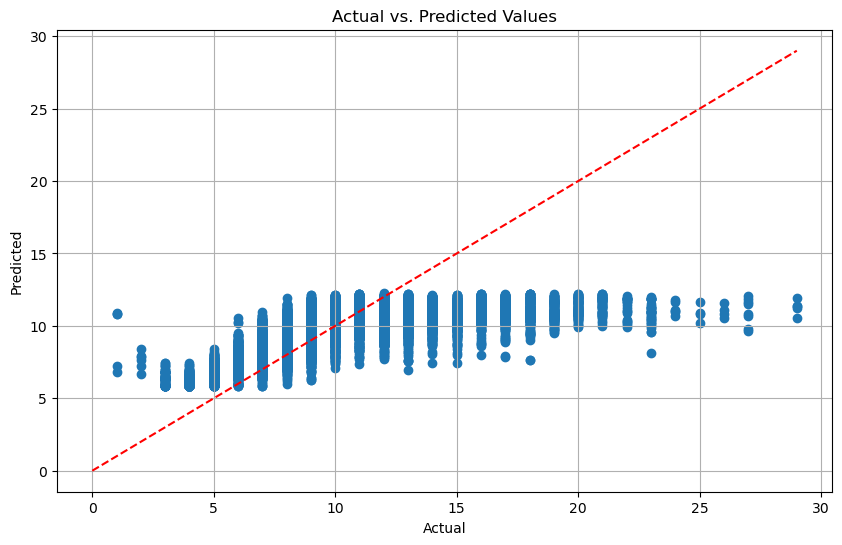

In [9]:
comparison_df = pd.DataFrame({'Actual': y_val, 'Predicted': predictions})
show(comparison_df)

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.plot([0, max(comparison_df['Actual'])], [0, max(comparison_df['Actual'])], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Inspect feature importances

I                 0.502490
F                 0.125977
M                 0.072654
Shell weight      0.054081
Height            0.048872
Diameter          0.048338
Length            0.047359
Whole weight.2    0.042013
Whole weight      0.041250
Whole weight.1    0.016966
dtype: float32

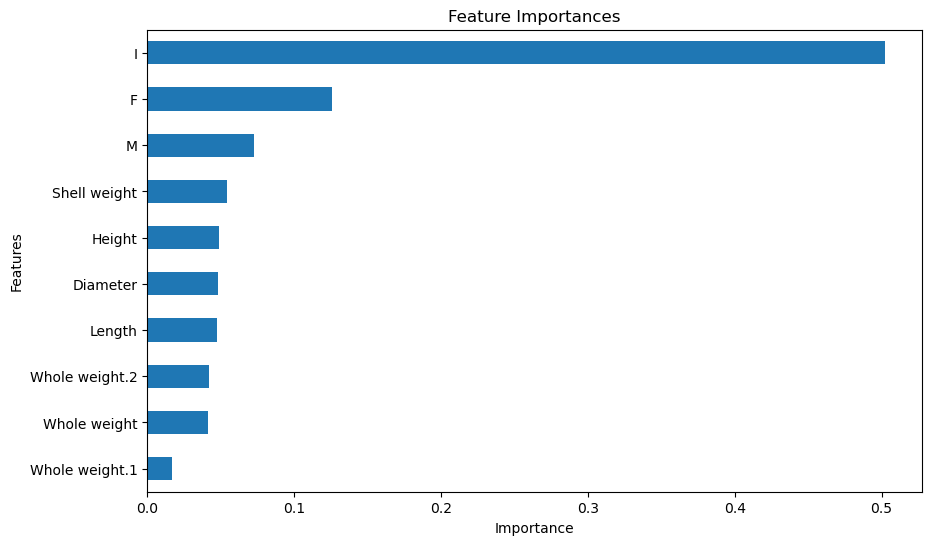

In [10]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
display(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10,6))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

# Submission

In [11]:
# Drop id column for predictions
df_test_drop = df_test.drop('id', axis=1)
show(df_test_drop)

# Make predictions on the test data
test_predictions = model.predict(df_test_drop)

# Format is 'id' and predicted 'Rings' values
submission_df = pd.DataFrame({'id': df_test['id'], 'Rings': test_predictions})
show(submission_df)

# Save the DataFrame to a CSV file
submission_df.to_csv('../data/processed/xg-submission.csv', index=False)